In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
#Dropping duplicated values

data = data.drop_duplicates()

In [5]:
cate_val=[] #To store categorical columns
cont_val=[] #To strore Numerical Columns

for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [6]:
print(cate_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [7]:
print(cont_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [8]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [10]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [13]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [14]:
x=data.drop('target',axis =1)

In [15]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [16]:
y=data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred1 = log.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_pred1)

0.819672131147541

In [23]:
from sklearn import svm

In [24]:
svm = svm.SVC()

In [25]:
svm.fit(x_train,y_train)

SVC()

In [26]:
y_pred2 = svm.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred2)

0.7704918032786885

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [31]:
y_pred3 = knn.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred3)

0.7540983606557377

In [33]:
score=[]

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [34]:
import matplotlib.pyplot as plt

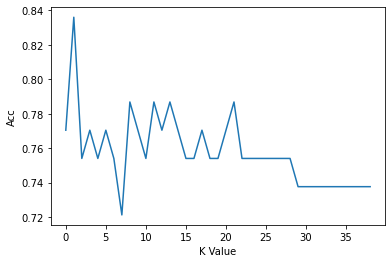

In [35]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [36]:
data = pd.read_csv('data.csv')

In [37]:
data = data.drop_duplicates()

In [38]:
data.shape

(302, 14)

In [39]:
x=data.drop('target',axis=1)
y=data['target']

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred4 = dt.predict(x_test)

In [45]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred5 = rf.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred5)

0.819672131147541

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc = GradientBoostingClassifier()

In [53]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
y_pred6 = gbc.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [56]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],"ACC":[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [57]:
final_data

,Models,ACC
0,LR,0.442623
1,SVM,0.459016
2,KNN,0.442623
3,DT,0.786885
4,RF,0.819672
5,GB,0.803279


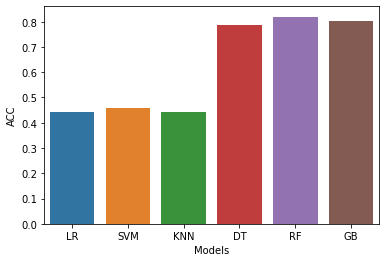

In [58]:
import seaborn as sns

sns.barplot(final_data['Models'],final_data["ACC"])

In [59]:
x = data.drop('target',axis=1)
y=data['target']

In [60]:
x.shape

(302, 13)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(x,y)

RandomForestClassifier()

In [64]:
import pandas as pd

In [65]:
new_data = pd.DataFrame({"age":52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])

In [66]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [67]:
p = rf.predict(new_data)

if p[0]==0:
  print("Patient is not suffering from any Heart Disease")

else:
  print("Patient is suffering from Heart Disease")

Patient is not suffering from any Heart Disease


In [68]:
import joblib

In [69]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [70]:
model = joblib.load('model_joblib_heart')

In [71]:
model.predict(new_data)

array([0], dtype=int64)

In [72]:
from tkinter import *
import joblib

In [73]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")
master.config(padx=50,pady=50)#use for padding


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "red", fg = "#FFB6C1"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()